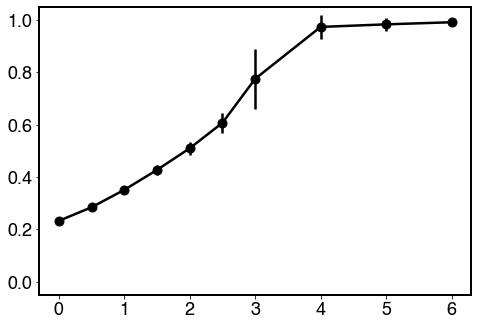

In [1]:
import math
import numpy as np
import networkx, pylab
from matplotlib import pyplot
from scipy.cluster import hierarchy
from networkx.drawing.nx_agraph import graphviz_layout
from matplotlib.pyplot import gca
import string

eps = [0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5, 6]

percbound_alleps_cut1 = [0.232475955, 0.284313339, 0.35086561, 0.427023423, 0.509682626, 0.606988208, 0.775114744, 0.973157077, 0.982942639, 0.991013707]
percsearch_alleps_cut1 = [0.767524048, 0.715686658, 0.649134388, 0.572976577, 0.490317377, 0.393011791, 0.224885258, 0.026842925, 0.017057364, 0.008986293]
std_alleps_cut1 = [0.01, 0.012253307, 0.015188763, 0.018880288, 0.025428116, 0.038987743, 0.114824594, 0.046138452, 0.025864906, 0.014869388]

hfont = {'fontname':'Helvetica'}

fig = pyplot.figure()
ax = fig.add_axes([0,0,1,1])
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
pyplot.xticks(fontsize=18)
pyplot.yticks(fontsize=18)
pyplot.errorbar(eps, percbound_alleps_cut1, yerr=std_alleps_cut1, marker='o', c='k', linewidth=2.5, ms=9)
pyplot.ylim((-0.05,1.05))
pyplot.savefig('./images/percboundsearch_cut0.01.png', bbox_inches='tight', dpi=300)


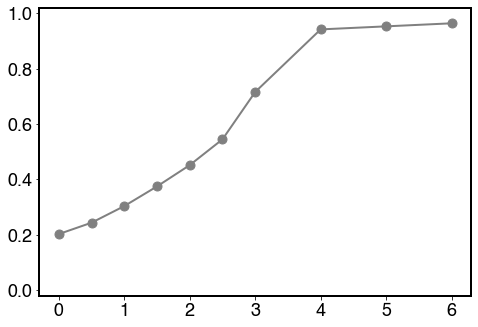

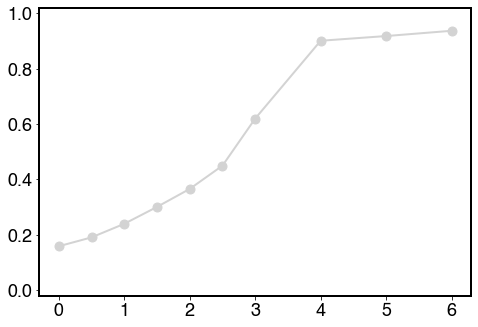

In [2]:
import math
import numpy as np
import networkx, pylab
from matplotlib import pyplot
from scipy.cluster import hierarchy
from networkx.drawing.nx_agraph import graphviz_layout
from matplotlib.pyplot import gca
import string

eps = [0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5, 6]

percbound_alleps_cut08 = [0.2030, 0.244, 0.304, 0.375, 0.452, 0.545, 0.716, 0.942, 0.953, 0.964]
percbound_alleps_cut05 = [0.1590, 0.191, 0.240, 0.301, 0.366, 0.450, 0.620, 0.901, 0.918, 0.937]

hfont = {'fontname':'Helvetica'}

fig = pyplot.figure()
ax = fig.add_axes([0,0,1,1])
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
pyplot.xticks(fontsize=18)
pyplot.yticks(fontsize=18)
pyplot.errorbar(eps, percbound_alleps_cut08, marker='o', c='gray', linewidth=2, ms=9)
pyplot.ylim((-0.02,1.02))
pyplot.savefig('./images/percboundsearch_cut0.008.png', bbox_inches='tight', dpi=300)

fig = pyplot.figure()
ax = fig.add_axes([0,0,1,1])
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
for tick in ax.get_xticklabels():
    tick.set_fontname("Helvetica")
for tick in ax.get_yticklabels():
    tick.set_fontname("Helvetica")
pyplot.xticks(fontsize=18)
pyplot.yticks(fontsize=18)
pyplot.errorbar(eps, percbound_alleps_cut05, marker='o', c='lightgray', linewidth=2, ms=9)
pyplot.ylim((-0.02,1.02))
pyplot.savefig('./images/percboundsearch_cut0.005.png', bbox_inches='tight', dpi=300)


/var/folders/1x/9r7lr3954kx3j3fgn09kp_p00000gn/T/ipykernel_30408/1937585840.py:31: RuntimeWarning: overflow encountered in power
  return a*np.power(x, b)


initial exponent 1.903999287698271
final exponent   0.9496899485093658


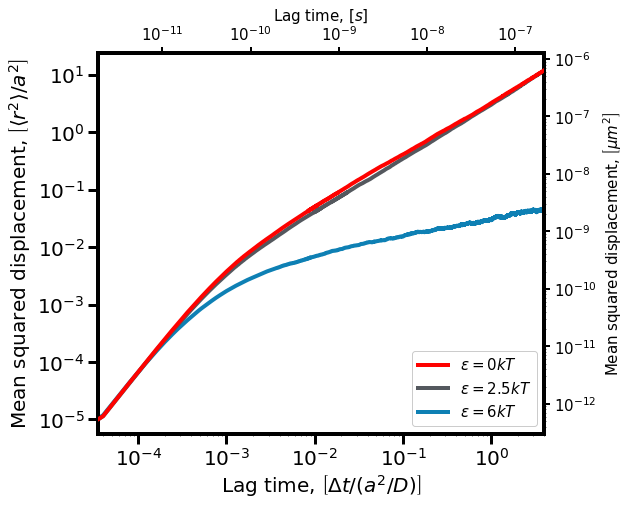

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from scipy import stats
from scipy.optimize import curve_fit

%matplotlib inline

msd_e0 = np.loadtxt('../FIG3C_S4B__BulkDynamics/msd_e0.txt')
msd_e25 = np.loadtxt('../FIG3C_S4B__BulkDynamics/msd_e2.5.txt')
msd_e6 = np.loadtxt('../FIG3C_S4B__BulkDynamics/msd_e6.txt')
time = np.array(msd_e0[:,0])
time = time*0.00001*4
msd_e0 = msd_e0[:,1]*4
msd_e25 = msd_e25[:,1]*4
msd_e6 = msd_e6[:,1]*4

def BTtoS(time):
    return time * 0.0000000534
def StoBT(x):
    return x / 0.0000000534

def MSDtoUM2(x):
    return x * (0.00260**2)
def UM2toMSD(x):
    return x / (0.00260**2)

def power_law(x, a, b):
    return a*np.power(x, b)

fig, ax = plt.subplots()

plt.plot(time,msd_e0,label='$\epsilon = 0 kT$',color='#FE0200',linewidth=4,zorder=3)
plt.plot(time,msd_e25,label='$\epsilon = 2.5 kT$',color='#54585E',linewidth=4,zorder=2)   
plt.plot(time,msd_e6,label='$\epsilon = 6 kT$',color='#0E80B4',linewidth=4,zorder=1)

pars, cov = curve_fit(f=power_law, xdata=time[1:5], ydata=msd_e0[1:5], p0=[1, 2])
stdevs = np.sqrt(np.diag(cov))
print('initial exponent', pars[1])

pars, cov = curve_fit(f=power_law, xdata=time[25000:], ydata=msd_e0[25000:], p0=[1, 1])
stdevs = np.sqrt(np.diag(cov))
print ('final exponent  ', pars[1])

ax.set_yscale('log')
ax.set_xscale('log')
leg = ax.legend(prop={'size':15},loc='lower right',facecolor='white',framealpha=1)
ax.set_xlim(3.5e-5,4)
ax.set_xlabel(r'Lag time, $\left[ \Delta t / (a^2/D) \right]$',size=20)
ax.set_ylabel(r'Mean squared displacement, $\left[ \langle r^2 \rangle / a^2 \right]$',size=20)

for ax in [ax]:
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.tick_params(axis='both', labelsize=20,width=3,length=10)
    
secax_x = ax.secondary_xaxis('top', functions=(BTtoS, StoBT))
secax_x.set_xlabel(r'Lag time, $\left[ s \right]$',size=15)
secax_x.tick_params(labelsize=15,width=2,length=6)
secax_y = ax.secondary_yaxis('right', functions=(BTtoS, StoBT))
secax_y.set_ylabel(r'Mean squared displacement, $\left[ \mu m^2 \right]$',size=15)
secax_y.tick_params(labelsize=15,width=2,length=6)
    
fig.set_size_inches(8, 7)
plt.savefig('./images/msd_shorttimes.png', bbox_inches='tight', dpi=300)
